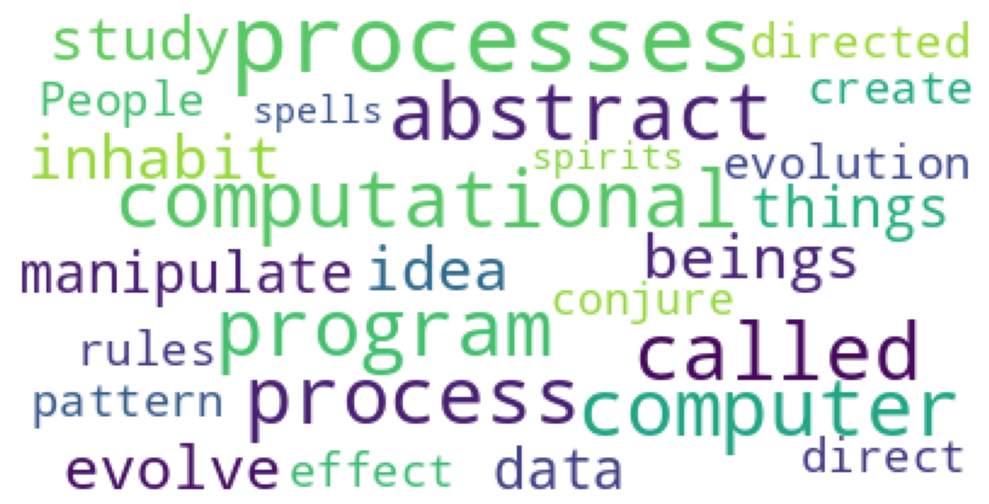

In [12]:
import re
import numpy as np
import string
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
sentences ="""We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40,
                          random_state=42
                         ).generate(sentences)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.imshow(wordcloud)
axes.axis('off')
fig.tight_layout()

In [ ]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

In [15]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()
print(sentences)

we are about to study the idea of computational process computational processes are abstract beings that inhabit computers as they evolve processes manipulate other abstract things called data the evolution of process is directed by pattern of rules called program people create programs to direct processes in effect we conjure the spirits of the computer with our spells


In [18]:
words = sentences.split()
vocab = set(words)
print(words)
print(vocab)

['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'computational', 'process', 'computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers', 'as', 'they', 'evolve', 'processes', 'manipulate', 'other', 'abstract', 'things', 'called', 'data', 'the', 'evolution', 'of', 'process', 'is', 'directed', 'by', 'pattern', 'of', 'rules', 'called', 'program', 'people', 'create', 'programs', 'to', 'direct', 'processes', 'in', 'effect', 'we', 'conjure', 'the', 'spirits', 'of', 'the', 'computer', 'with', 'our', 'spells']
{'direct', 'they', 'called', 'rules', 'in', 'effect', 'computer', 'computational', 'about', 'manipulate', 'things', 'pattern', 'directed', 'are', 'other', 'people', 'as', 'inhabit', 'evolve', 'create', 'that', 'study', 'the', 'process', 'abstract', 'of', 'idea', 'our', 'data', 'with', 'program', 'programs', 'is', 'by', 'to', 'computers', 'conjure', 'spirits', 'processes', 'evolution', 'we', 'spells', 'beings'}


In [20]:
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

In [23]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}
print(word_to_ix)
print(ix_to_word)

{'direct': 0, 'they': 1, 'called': 2, 'rules': 3, 'in': 4, 'effect': 5, 'computer': 6, 'computational': 7, 'about': 8, 'manipulate': 9, 'things': 10, 'pattern': 11, 'directed': 12, 'are': 13, 'other': 14, 'people': 15, 'as': 16, 'inhabit': 17, 'evolve': 18, 'create': 19, 'that': 20, 'study': 21, 'the': 22, 'process': 23, 'abstract': 24, 'of': 25, 'idea': 26, 'our': 27, 'data': 28, 'with': 29, 'program': 30, 'programs': 31, 'is': 32, 'by': 33, 'to': 34, 'computers': 35, 'conjure': 36, 'spirits': 37, 'processes': 38, 'evolution': 39, 'we': 40, 'spells': 41, 'beings': 42}
{0: 'direct', 1: 'they', 2: 'called', 3: 'rules', 4: 'in', 5: 'effect', 6: 'computer', 7: 'computational', 8: 'about', 9: 'manipulate', 10: 'things', 11: 'pattern', 12: 'directed', 13: 'are', 14: 'other', 15: 'people', 16: 'as', 17: 'inhabit', 18: 'evolve', 19: 'create', 20: 'that', 21: 'study', 22: 'the', 23: 'process', 24: 'abstract', 25: 'of', 26: 'idea', 27: 'our', 28: 'data', 29: 'with', 30: 'program', 31: 'programs

In [27]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])


[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea')]


In [30]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))
print(embeddings)

[[0.55902317 0.8796336  0.01606508 0.83640464 0.94515038 0.03671365
  0.27138932 0.69865781 0.7621218  0.49927705]
 [0.10055462 0.63714277 0.42372804 0.478108   0.26711547 0.09149576
  0.29168269 0.94036423 0.22413572 0.39162099]
 [0.95464716 0.38335215 0.68628304 0.01724722 0.65466762 0.82630526
  0.14338801 0.47979158 0.55403334 0.59806094]
 [0.84383432 0.23158652 0.49851811 0.52690493 0.19314359 0.03769864
  0.9239182  0.58604157 0.29585361 0.75399642]
 [0.30806521 0.34873435 0.68050268 0.88605163 0.34890095 0.04797554
  0.69039153 0.86210584 0.19452842 0.27652878]
 [0.44921168 0.01018458 0.10001453 0.36017239 0.37986563 0.57077681
  0.36082491 0.15131566 0.79828081 0.21166546]
 [0.10538946 0.86263733 0.97936195 0.80499425 0.47077666 0.15855748
  0.20198191 0.74666776 0.11708653 0.26319007]
 [0.96836749 0.51423675 0.46540649 0.4272708  0.45180645 0.78393261
  0.93397244 0.53718584 0.36399799 0.12210278]
 [0.29130761 0.14499853 0.85154888 0.44465339 0.58324302 0.64895118
  0.13842134